In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import seaborn as sn
import matplotlib.pyplot as plt

# Pre processing data

In [5]:
data = pd.read_csv("/kaggle/input/mqttset/train70_augmented.csv")

# transform to df
data = pd.DataFrame(data)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [6]:
# columns_0 are columns with values equal to 0
columns_0 = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos',
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag',
           'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len',
           'mqtt.willtopic', 'mqtt.willtopic_len']
data = data.drop(columns_0, axis=1)

In [7]:
# encoder cateagorical features
label = LabelEncoder()

data['tcp.flags'] = label.fit_transform(data['tcp.flags'])
data['mqtt.conack.flags'] = label.fit_transform(data['mqtt.conack.flags'])
data['mqtt.hdrflags'] = label.fit_transform(data['mqtt.hdrflags'])
data['mqtt.protoname'] = label.fit_transform(data['mqtt.protoname'])
data['mqtt.msg'] = label.fit_transform(data['mqtt.msg'])
data['mqtt.conflags'] = label.fit_transform(data['mqtt.conflags'])
data['target'] = label.fit_transform(data['target'])

In [8]:
# correlation analysis

correlation = data.corr()

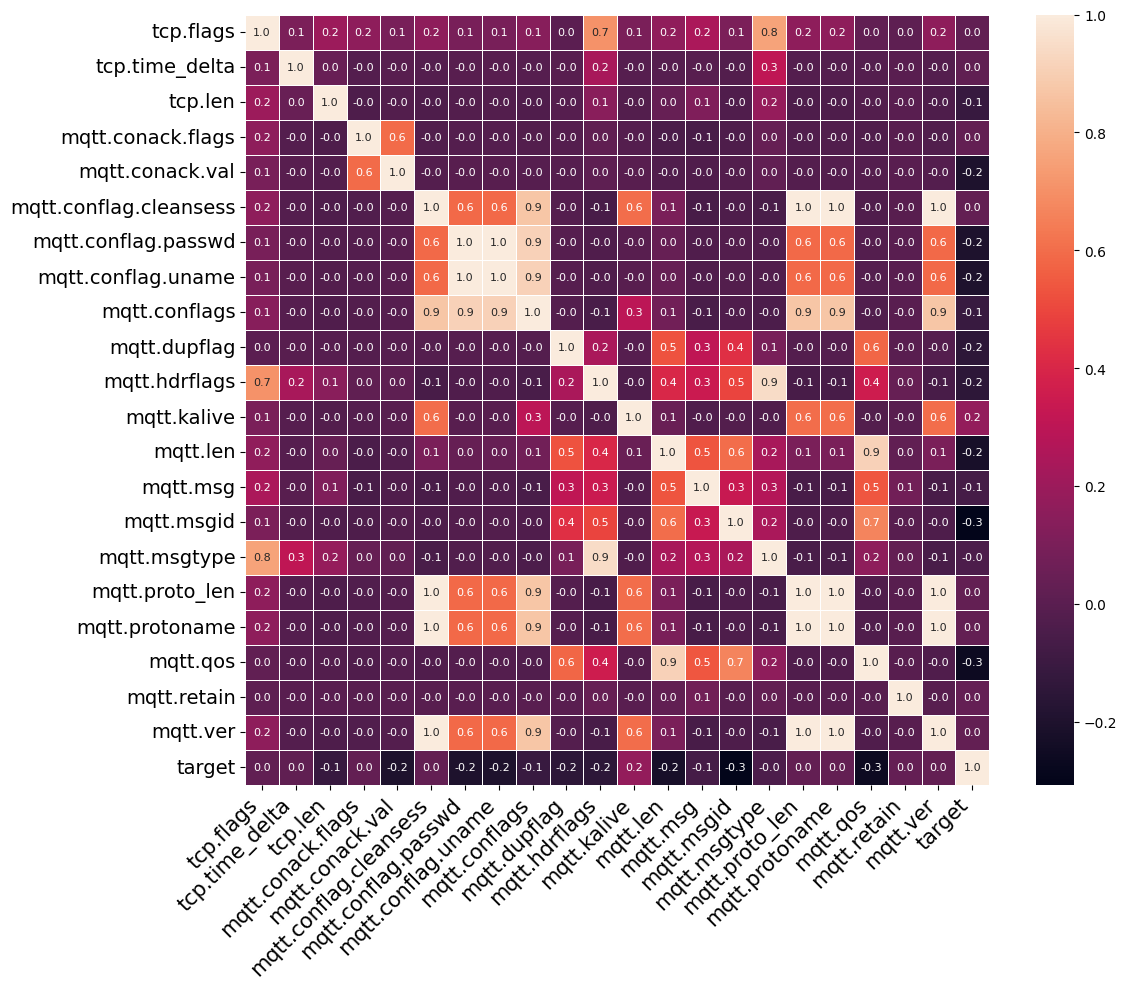

In [17]:
# correlation matrix

plt.figure(figsize=(12, 10))
plot = sn.heatmap(correlation, annot=True, fmt=".1f", linewidths=0.6, annot_kws={"size": 8})
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)



plt.show()